# Import Packages
Here, we import numpy, pandas and matplotlib which is used for manipulation of arrays, processing of csv files and plot visualization respectively.
- Here, we import the stats module which contains some statistical functions such as norm and skew which we’ll use for calculating some statistics.
- We import seaborn. A powerful plotting library built on top of matplotlib. We’ll use this for creating some insightful plots.
- Python may throw some annoying warnings, we stop this using the ignore_warns function.
- We import os, a package for accessing files and folders easily. We use the os.listdir to show the content of our current directory (Present working directory).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

In [3]:
supermarket_data = pd.read_csv(r'D:\My folder\medium_tutorial_notebooks-master\medium_tutorial_notebooks-master\train.csv')
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [5]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [6]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [10]:
supermarket_data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

Let’s know our features. Since the number of features is small, we can manually look at them and instantly remove the ones that aren’t worth exploring or putting into our model. 

In [11]:
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [13]:
newdata.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [14]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

# Data Visualization


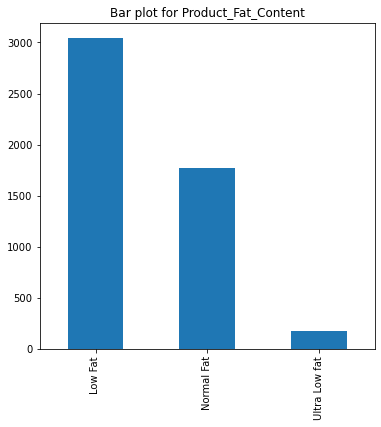

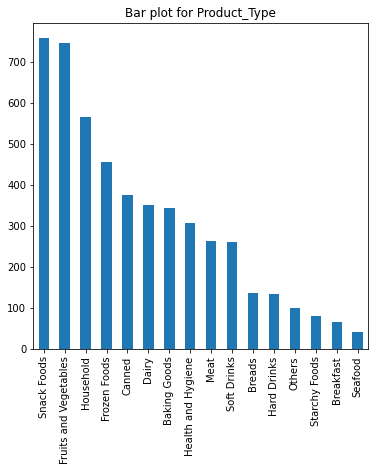

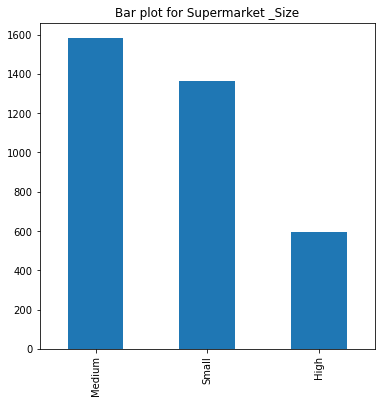

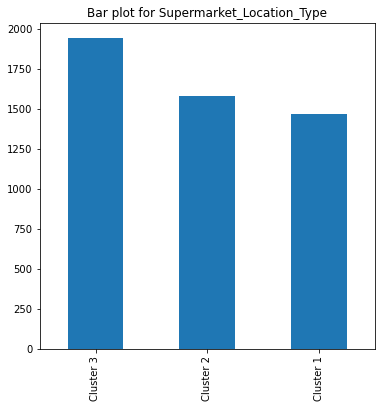

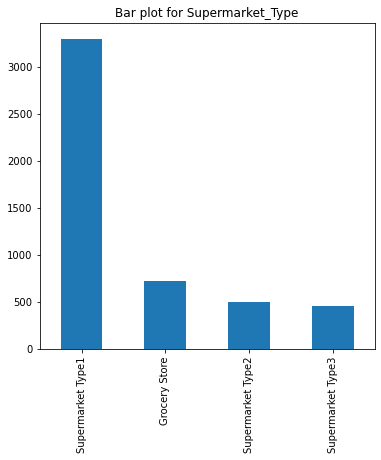

In [15]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

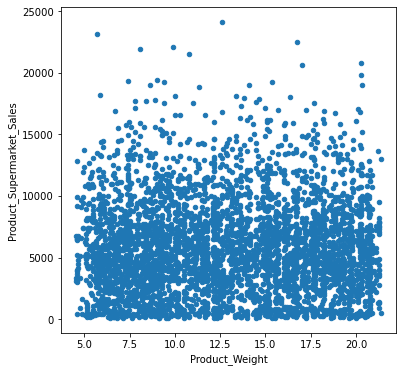

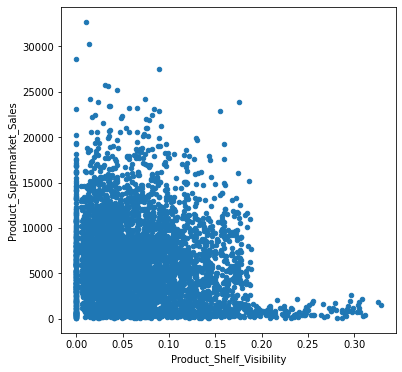

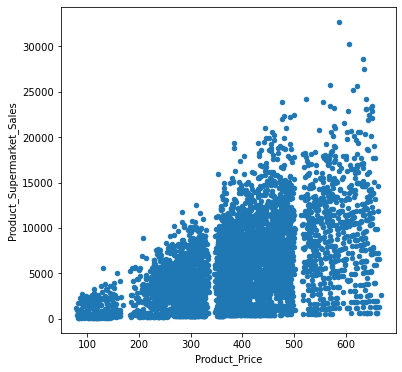

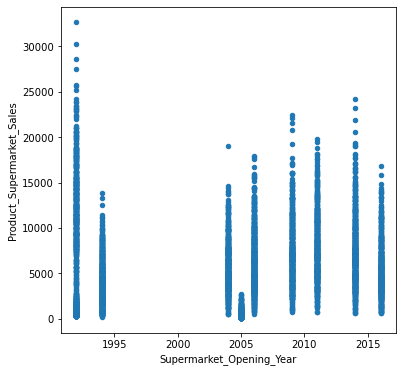

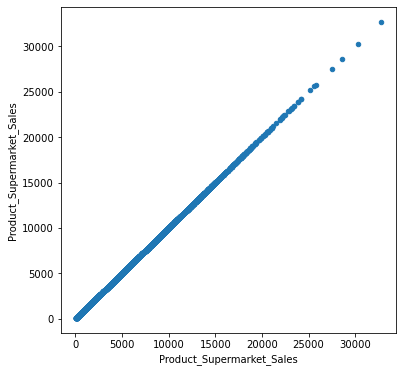

In [16]:

for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    newdata.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)

# Box plot categorical column against target column

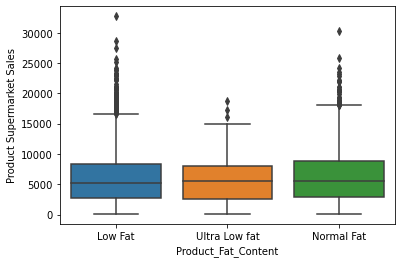

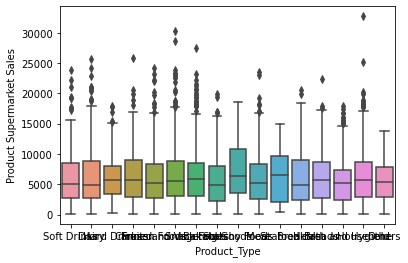

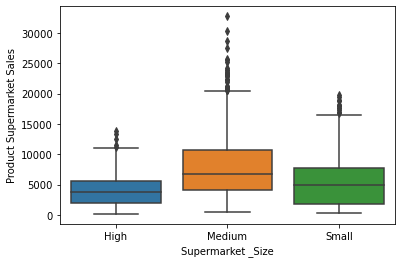

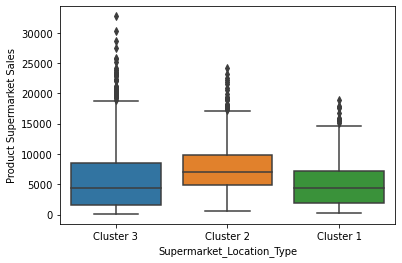

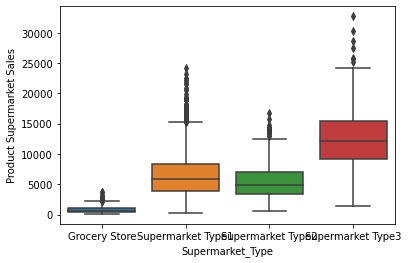

In [17]:
for col in cat_cols:
    sns.boxplot(col, 'Product_Supermarket_Sales', data=newdata)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()

check the relationship between my target variable and these numeric features. One quick way to do this is to use the seaborn heatmap plot. This seaborn heatmap takes the correlation matrix calculated on the numerical features in our dataset and makes a heated plot of it. 

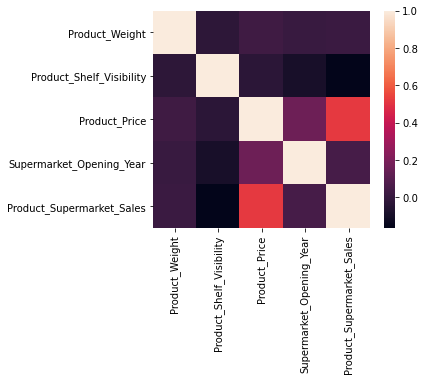

In [18]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = newdata.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

- Tracing horizontally to the left leads to Product_Weight and tracing it vertically downwards, leads to Product_Price. This means the square box is showing us how correlated Product_Weight and Product_Price are. We can see that they’re not really correlated as the square is almost cold.

- Label 4 shows the correlation between Product_Price and Product_Supermarket_Sales. We clearly see that the region is hot, meaning there’s a high correlation.

- this plot shows that the Product_Price is the most correlated feature with our target of interest Product_Supermarket_Sales, and it makes sense with our intuition that if more expensive products are sold, then the total product_Supermarket_Sales will likely increase 
- this is telling us that the supermarket opening year seems to be affecting the prices of products. It could be positively (Newer Supermarkets sell more) or it could be negative (Old Supermarkets have more loyal customers and sell more)

<Figure size 432x288 with 0 Axes>

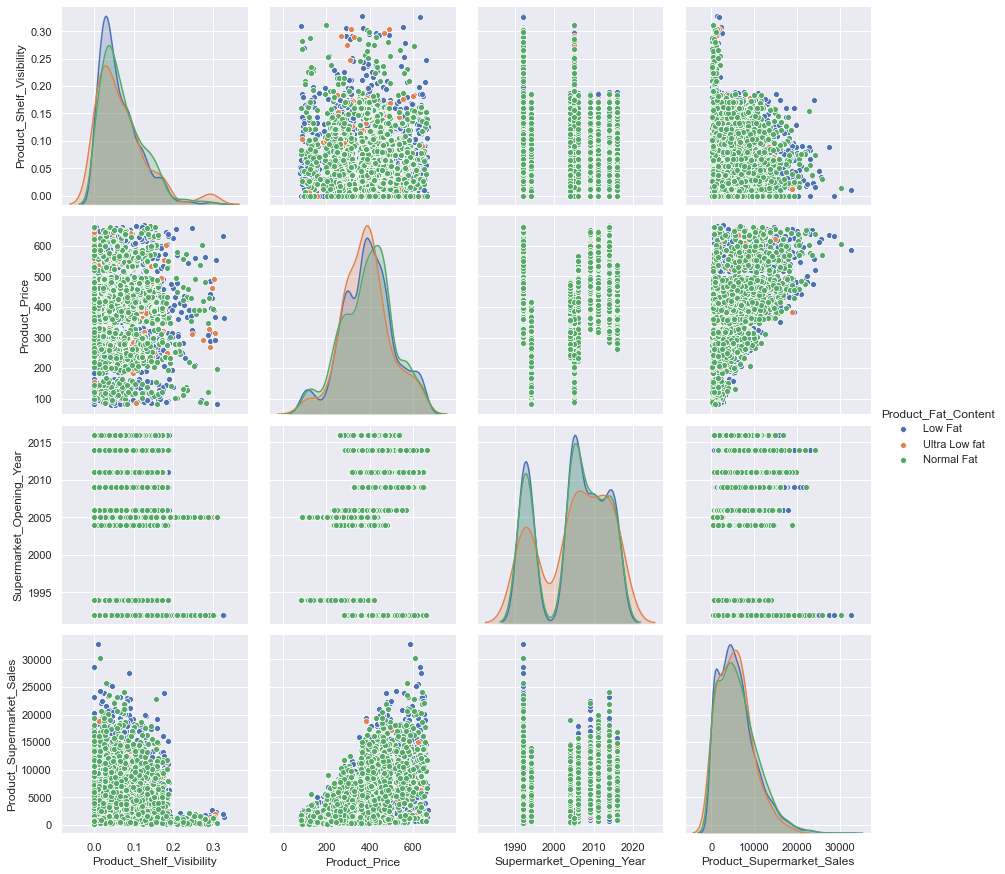

<Figure size 432x288 with 0 Axes>

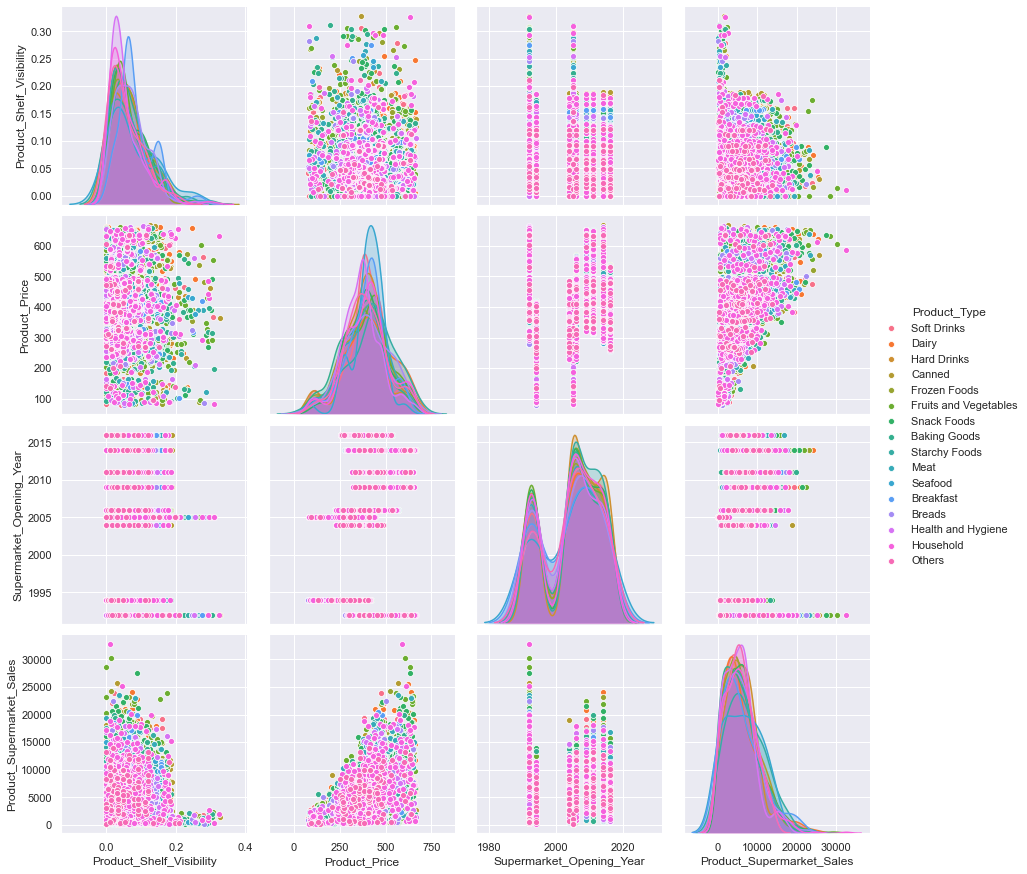

<Figure size 432x288 with 0 Axes>

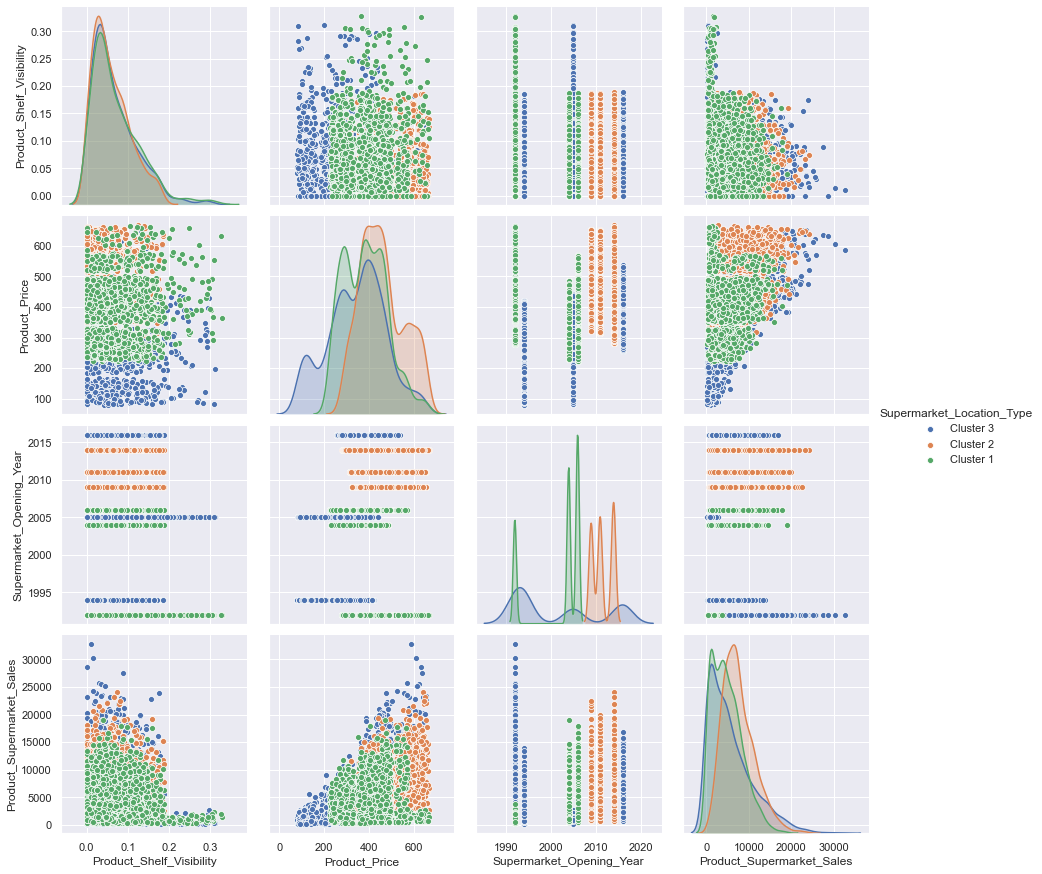

TypeError: 'NoneType' object is not callable

<Figure size 432x288 with 0 Axes>

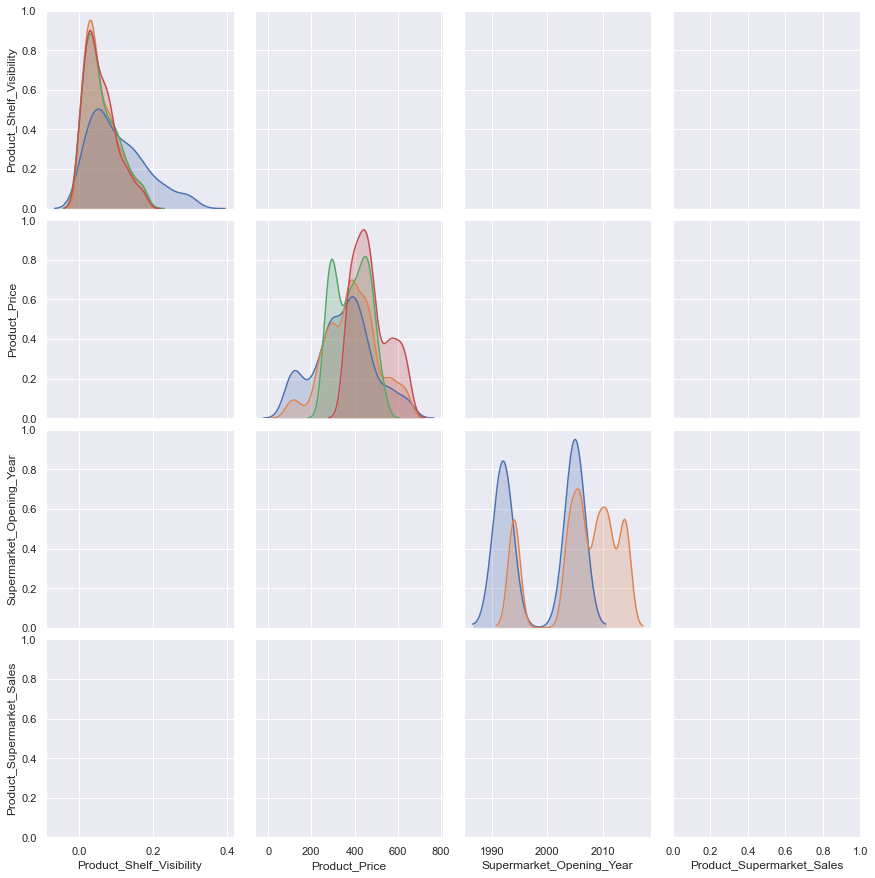

In [19]:
cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type', 'Supermarket_Type' ]

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(newdata[cols_2_pair], height=3.0, hue=col)
    plt.show()

- Here we list out all categorical features in our data set. (we’ll be using them for coloring. Meaning we’ll have one set of pairplot for each categorical feature.
- Inside the for loop, we list out all columns without missing values.
- Create a new figure each time
- Call the one line wonder pairplot( ) and pass our data “train” and the columns we want. We specify a size of 3.0 so we can see the complete pairplot without scrolling.
- The hue variable takes a column from our categorical columns and use them in coloring our pairplots.


- There is positive trend between product price and super market sales. This confirms the correlation shown by the heatmap plot (Positive Correlation). So what can we possibly do with this knowledge?
- Well, this feature is definitely very important. We could create more features from it.
- We also notice that our target variable (Product_Supermarket_Sales) and the variable Product_Shelf_Visibility are right skewed.
- We can also see that the prices of low Fat and Ultra low fat is relatively higher than that of normal fat product. So what can we possibly do with this knowledge? Well, we could create a categorical feature where we set the price of Normal Fat product to low and Low/Ultra Low Fat products to high.
- Another thing I noticed is that there seems to be a gap between Supermarket_Opening_Year. Notice the cluster of Supermarkets in the 90s and another cluster in the 2000s. What can we possibly do with this knowledge? Well, we could create a new feature column to capture these two clusters.